In this notebook, you should use the equations and general recipe covered in the lecture to perform logistic regression on part of the MNIST dataset. When in doubt, looking at the slides may help your memory ;)

In [1]:
#load packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt


In [2]:
#make helper functions

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()


In [3]:
#load data

from mlxtend.data import mnist_data
X, y = mnist_data()


#we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y=np.expand_dims(y,1)

/var/folders/n9/2fxvhy3510z639rwyh9twwy40000gn/T/ipykernel_61798/1119189001.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('true label: %d' % y[idx])


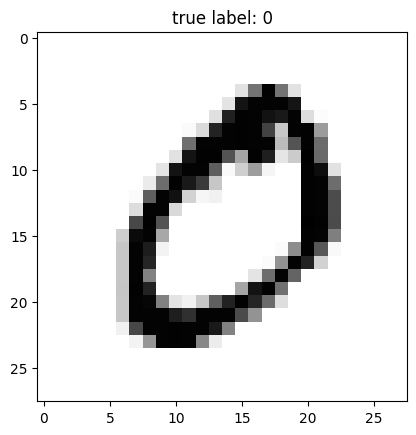

In [4]:
#inspect data

#(plot digit)
plot_digit(X, y, 0)

![Screenshot 2025-09-02 at 12.40.19.png](<attachment:Screenshot 2025-09-02 at 12.40.19.png>)
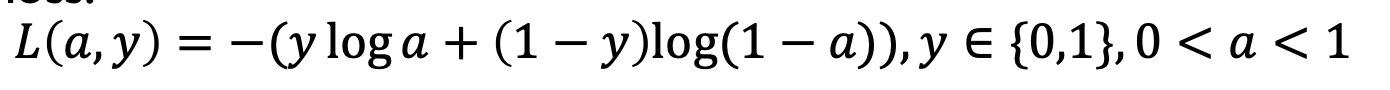

In [5]:
# create a (binary cross entropy) loss function as discussed in the slides:
def avrLoss(y,a):           #page59 in week1's slides     Binary cross-entropy function

  loss = -(y * np.log(a) + (1 - y) * np.log(1 - a))

  return np.mean(loss)

In [6]:
#test loss function:
#(just run this cell and see what happens)

loss = avrLoss(np.array([0,1,0,1]),np.linspace(.1,.9,4))
assert np.all(loss==0.5543313122608056)

![Screenshot 2025-09-02 at 12.40.04.png](<attachment:Screenshot 2025-09-02 at 12.40.04.png>)
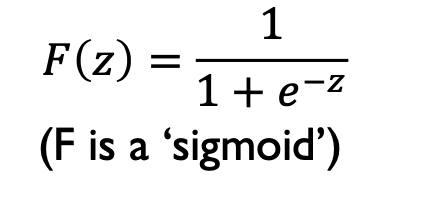

In [7]:
#create a sigmoid          page 58
def sigmoid(z):
  return 1 / (1 + np.e**(-z))

In [8]:
#check sigmoid
#(just run this cell and see what happens)

out=sigmoid(np.array(range(-5,5)))
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))

In [9]:
#make test & train data

Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

![Screenshot 2025-09-02 at 12.54.13.png](<attachment:Screenshot 2025-09-02 at 12.54.13.png>)
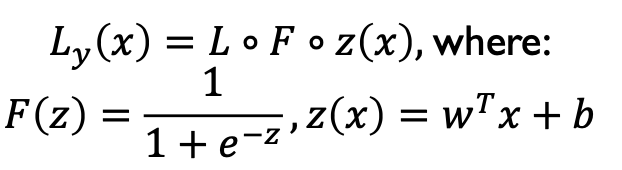

In [10]:
np.shape(Xtrain)

(700, 784)

In [11]:
w_t = np.random.rand(1000, 1)      #random (rækkevektor)
b_t = np.random.rand(1, 784) 

a_t = sigmoid(w_t.T @ X + b_t)
a_t.shape

(1, 784)

In [29]:
#train

#INITIATE WEIGHTS AND BIASES (w,b)
w = np.zeros((784, 1))     #random (rækkevektor)
b = 0                           #random (scalar)

nEpoch = 50   #random

accuracy = np.zeros(nEpoch)
trainRate = 0.5 #pick a number less than 1

for iTrain in range(nEpoch):
  #evaluate
  #CALCULATE a
  a = sigmoid(np.dot(Xtrain, w) + b)

  #calculate loss & accuracy
  loss =  avrLoss(ytrain, a)  #use the function you defined

  yhat = a > .5
  accuracy[iTrain] = np.mean(yhat == ytrain)

  #update weights       page62      the same page with 'UPDATE W AND b'

  m = Xtrain.shape[0]
  wgrad = (1/m) * np.dot(Xtrain.T, (a - ytrain))
  bgrad = (1/m) * np.sum(a - ytrain)


  w -= trainRate * wgrad   #a,ytrain,and xtrian.T,
  b -= trainRate * bgrad

#formulas are in page 62,and a is calculated from sigmoid ; y is ytrain;
#                           and x is the data or images you loaded

  assert(wgrad.shape == w.shape)

  #UPDATE W AND b
 #Notes: the 'some sensible step size' mentioned in page62 is just the trainRate

  if np.mod(iTrain,10)==0:
    print(iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

0 0.6931471805599454 0.5
10 nan 0.9985714285714286
20 nan 0.9985714285714286
30 nan 1.0
40 nan 1.0
train accuracy: 100.0 %
test accuracy: 99.33333333333333 %


/var/folders/n9/2fxvhy3510z639rwyh9twwy40000gn/T/ipykernel_61798/3685227217.py:3: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.e**(-z))
/var/folders/n9/2fxvhy3510z639rwyh9twwy40000gn/T/ipykernel_61798/2569842089.py:4: RuntimeWarning: divide by zero encountered in log
  loss = -(y * np.log(a) + (1 - y) * np.log(1 - a))
/var/folders/n9/2fxvhy3510z639rwyh9twwy40000gn/T/ipykernel_61798/2569842089.py:4: RuntimeWarning: invalid value encountered in multiply
  loss = -(y * np.log(a) + (1 - y) * np.log(1 - a))


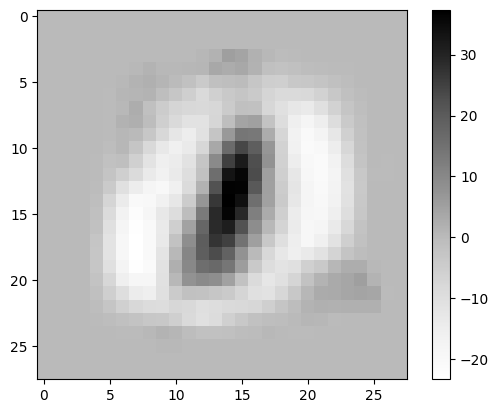

In [30]:
#see what the network does:

img = w.reshape(28,28)
h=plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy:  1.0
Test accuracy:  0.9933333333333333


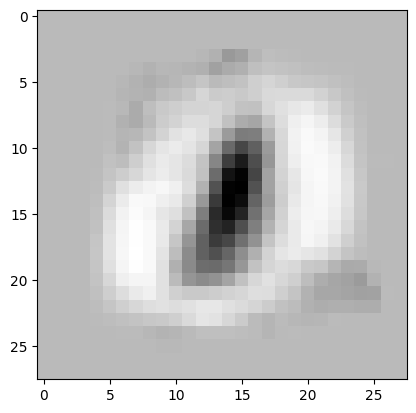

In [28]:
#commpare with scikit-learn:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(Xtrain, ytrain)

clf.predict(X)
print('Train accuracy: ',clf.score(Xtrain, ytrain))
print('Test accuracy: ',clf.score(Xtest, ytest))

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()